<h1 align=center><font size = 5>Access to Drinking Water and Mortality rate</font></h1>

<h1 align=center><font size = 5>Ryan Díaz-Pérez</font></h1>

## Introduction

This work is my Capstone Project to fulfilled the final requirement for the IBM Data Science Professional Certificate. The IBM Data Science Professional Certificate consist of 9 courses covering topics such as open source tools and libraries, methodologies, Python, databases, SQL, data visualization, data analysis, and machine learning.

This project will explore if there is an impact on drinking water resources and population growth by regions in the world. Sub-Saharan Africa, East Asia & Pacific, South Asia, Latin America & Caribbean, Middle East & North Africa, Europe & Central Asia, and North America.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Data Exploration & Wrangling</a>   

2. <a href="#item2">Visualize the Data</a>

3. <a href="#item3">Exploratory Data Analysis</a>

4. <a href="#item4">Model Development</a>
   
5. <a href="#item5">Model Training</a>
    
</font>
</div>

Before we start exploring the data, let's download all the dependencies that we will need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### 1. Data Exploration & Wrangling

Data Frames

In [2]:
data_1 = 'share_deaths_unsafe_water.csv'
data_2 = 'share-of-the-population-with-access-to-improved-drinking-water.csv'
data_3 = 'total_population.csv'
data_4 = 'population_growth_rates.csv'

death_unsafe_water_df = pd.read_csv(data_1)
improved_water_access_df = pd.read_csv(data_2)
total_population_df = pd.read_csv(data_3)
population_growth_rates_df = pd.read_csv(data_4)

I only want to look at the data for each region: Sub-Saharan Africa, East Asia & Pacific, South Asia, Latin America & Caribbean, Middle East & North Africa, Europe & Central Asia, North America

In [3]:
regions = ['Sub-Saharan Africa', 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'Europe & Central Asia', 'North America']

## 1.1 World population by region, 1960-2019

In [4]:
total_population_df.head()

# Selecting the regions that I care about
total_population_regions_df = total_population_df[(total_population_df['Country Name'].isin(regions))]

# Removing the columns that will not be use towards analysis
total_population_regions_df.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)

# Setting the Country Name column as the index for easier plotting and analysis later
total_population_regions_df.set_index('Country Name', inplace=True)

total_population_regions_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1.040958e+09,1.044545e+09,1.059019e+09,1.084796e+09,1.110214e+09,1.136691e+09,1.166600e+09,1.195270e+09,1.224531e+09,1.257455e+09,...,2.206885e+09,2.221673e+09,2.236819e+09,2.252047e+09,2.267482e+09,2.282856e+09,2.298514e+09,2.314202e+09,2.328221e+09,NaN
Europe & Central Asia,6.672536e+08,6.749630e+08,6.829217e+08,6.909466e+08,6.989011e+08,7.066261e+08,7.133953e+08,7.199799e+08,7.263074e+08,7.324941e+08,...,8.886273e+08,8.908629e+08,8.944868e+08,8.987661e+08,9.031300e+08,9.074982e+08,9.118124e+08,9.154202e+08,9.187936e+08,NaN
Latin America & Caribbean,2.199078e+08,2.259939e+08,2.322655e+08,2.386960e+08,2.452334e+08,2.518509e+08,2.585381e+08,2.652957e+08,2.721285e+08,2.790374e+08,...,5.903033e+08,5.969662e+08,6.035862e+08,6.101519e+08,6.166196e+08,6.229860e+08,6.292401e+08,6.353725e+08,6.413575e+08,NaN
Middle East & North Africa,1.052033e+08,1.080618e+08,1.110454e+08,1.141016e+08,1.172712e+08,1.205412e+08,1.239082e+08,1.274450e+08,1.310269e+08,1.347042e+08,...,3.859179e+08,3.939445e+08,4.019742e+08,4.099779e+08,4.179322e+08,4.258218e+08,4.335976e+08,4.412552e+08,4.489129e+08,NaN
North America,1.986244e+08,2.020075e+08,2.051986e+08,2.082537e+08,2.112629e+08,2.140311e+08,2.166590e+08,2.191760e+08,2.215030e+08,2.237590e+08,...,3.433961e+08,3.459839e+08,3.486532e+08,3.512057e+08,3.538890e+08,3.565108e+08,3.592454e+08,3.617513e+08,3.642903e+08,NaN


In [5]:
# Taking the transpose for easy plotting
total_population_regions_df = total_population_regions_df.transpose()

total_population_regions_df.head()

Country Name,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1960,1.040958e+09,667253650.0,219907801.0,105203269.0,198624409.0,572839523.0,227233223.0
1961,1.044545e+09,674962981.0,225993884.0,108061812.0,202007500.0,584939726.0,232567038.0
1962,1.059019e+09,682921730.0,232265533.0,111045434.0,205198600.0,597494449.0,238121698.0
1963,1.084796e+09,690946639.0,238696012.0,114101592.0,208253700.0,610498327.0,243893426.0
1964,1.110214e+09,698901133.0,245233432.0,117271166.0,211262900.0,623943332.0,249873743.0


In [6]:
# Changing the title of the index
total_population_regions_df.rename_axis(columns={'Country Name': 'Year'}, inplace =True)

total_population_regions_df.head()

Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1960,1.040958e+09,667253650.0,219907801.0,105203269.0,198624409.0,572839523.0,227233223.0
1961,1.044545e+09,674962981.0,225993884.0,108061812.0,202007500.0,584939726.0,232567038.0
1962,1.059019e+09,682921730.0,232265533.0,111045434.0,205198600.0,597494449.0,238121698.0
1963,1.084796e+09,690946639.0,238696012.0,114101592.0,208253700.0,610498327.0,243893426.0
1964,1.110214e+09,698901133.0,245233432.0,117271166.0,211262900.0,623943332.0,249873743.0


I only care the 1990-2015 time period

In [7]:
# Removing the the time periods that will not be use towards analysis
total_population_regions_df_1990_2015 = total_population_regions_df['1990':'2015'].copy()
total_population_regions_df_1990_2015.head()

Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1990,1.822193e+09,842570541.0,442040696.0,254215138.0,277373464.0,1.133495e+09,509451851.0
1991,1.848222e+09,846356322.0,450125305.0,261046309.0,281077441.0,1.158656e+09,523726913.0
1992,1.872481e+09,849757442.0,458175526.0,265656619.0,284943859.0,1.184133e+09,538246469.0
1993,1.895898e+09,852712876.0,466199679.0,272107828.0,288662674.0,1.209848e+09,553020362.0
1994,1.919360e+09,854685450.0,474193423.0,278384965.0,292185983.0,1.235694e+09,568072008.0


## 1.2 Population growth rate by region, 1960-2019

In [8]:
population_growth_rates_df.head()

# Selecting the regions that I care about
population_growth_rates_regions_df = population_growth_rates_df[(population_growth_rates_df['Country Name'].isin(regions))]

# Removing the columns that will not be use towards analysis
population_growth_rates_regions_df.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)

# Setting the Country Name column as the index for easier plotting and analysis later
population_growth_rates_regions_df.set_index('Country Name', inplace=True)

population_growth_rates_regions_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,NaN,0.344540,1.385694,2.434097,2.343115,2.384862,2.631194,2.457561,2.448094,2.688673,...,0.676314,0.670107,0.681736,0.680785,0.685391,0.678000,0.685905,0.682526,0.605775,NaN
Europe & Central Asia,NaN,1.155382,1.179139,1.175085,1.151246,1.105300,0.957966,0.922996,0.878846,0.851798,...,0.390515,0.251582,0.406780,0.478408,0.485542,0.483675,0.475392,0.395673,0.368512,NaN
Latin America & Caribbean,NaN,2.767561,2.775141,2.768589,2.738806,2.698420,2.655241,2.613752,2.575565,2.538838,...,1.123295,1.128726,1.108944,1.087783,1.060012,1.032471,1.003880,0.974580,0.941967,NaN
Middle East & North Africa,NaN,2.717162,2.761033,2.752169,2.777853,2.788450,2.793190,2.854371,2.810589,2.806514,...,2.126021,2.079883,2.038280,1.991087,1.940194,1.887753,1.826082,1.766063,1.735419,NaN
North America,NaN,1.703260,1.579694,1.488850,1.444968,1.310311,1.227812,1.161733,1.061704,1.018496,...,0.860596,0.753591,0.771521,0.732087,0.764029,0.740861,0.767035,0.697540,0.701862,NaN


In [9]:
population_growth_rates_regions_df = population_growth_rates_regions_df.transpose()

population_growth_rates_regions_df.head()

Country Name,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,0.344540,1.155382,2.767561,2.717162,1.703260,2.112320,2.347287
1962,1.385694,1.179139,2.775141,2.761033,1.579694,2.146328,2.388412
1963,2.434097,1.175085,2.768589,2.752169,1.488850,2.176401,2.423856
1964,2.343115,1.151246,2.738806,2.777853,1.444968,2.202300,2.452021


In [10]:
# Changing the title of the index
population_growth_rates_regions_df.rename_axis(columns={'Country Name': 'Year'}, inplace =True)

population_growth_rates_regions_df.head()

Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,0.344540,1.155382,2.767561,2.717162,1.703260,2.112320,2.347287
1962,1.385694,1.179139,2.775141,2.761033,1.579694,2.146328,2.388412
1963,2.434097,1.175085,2.768589,2.752169,1.488850,2.176401,2.423856
1964,2.343115,1.151246,2.738806,2.777853,1.444968,2.202300,2.452021


I only care the 1990-2015 time period

In [11]:
# Removing the the time periods that will not be use towards analysis
population_growth_rates_regions_df_1990_2015 = population_growth_rates_regions_df['1990':'2015'].copy()
population_growth_rates_regions_df_1990_2015.head()

Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1990,1.505942,0.525913,1.870091,3.569673,1.174097,2.236199,2.834931
1991,1.428443,0.449313,1.828929,2.687161,1.335375,2.219720,2.802043
1992,1.312534,0.401854,1.788440,1.766089,1.375570,2.198902,2.772352
1993,1.250576,0.347797,1.751327,2.428401,1.305104,2.171586,2.744819
1994,1.237525,0.231329,1.714661,2.306856,1.220563,2.136309,2.721716


## 1.3 Share of deaths from unsafe water sources, 1990-2017

In [12]:
death_unsafe_water_df.head()
death_unsafe_water_regions_df = death_unsafe_water_df[(death_unsafe_water_df['Entity'].isin(regions))]

In [13]:
death_unsafe_water_regions_df.head()

,Entity,Year,Share of deaths from unsafe water sources (%)
1680,East Asia & Pacific,1990,1.61
1681,East Asia & Pacific,1991,1.50
1682,East Asia & Pacific,1992,1.39
1683,East Asia & Pacific,1993,1.30
1684,East Asia & Pacific,1994,1.23


I want the last two data sets to have the same format as the first two for easier analysis.

In [14]:
# Function to get the arrays of data for each region
def unsafe_water(x):
    unsafe_water_regions = death_unsafe_water_regions_df[(death_unsafe_water_regions_df['Entity'].isin([x]))]
    return unsafe_water_regions['Share of deaths from unsafe water sources (%)']

north_america_unsafe_water = unsafe_water('North America').values
latin_america_unsafe_water = unsafe_water('Latin America & Caribbean').values
sub_suharan_unsafe_water = unsafe_water('Sub-Saharan Africa').values
middle_east_unsafe_water = unsafe_water('Middle East & North Africa').values
europe_central_asia_unsafe_water = unsafe_water('Europe & Central Asia').values
east_asia_pacific_unsafe_water = unsafe_water('East Asia & Pacific').values
south_asia_unsafe_water = unsafe_water('South Asia').values

years_unsafe_water = death_unsafe_water_regions_df['Year'].unique()
#print(years_unsafe_water)

In [15]:
data = {'Country Name':years_unsafe_water, 'North America':north_america_unsafe_water, 'Latin America & Caribbean':latin_america_unsafe_water, 'Sub-Saharan Africa':sub_suharan_unsafe_water, 'Middle East & North Africa':middle_east_unsafe_water, 'Europe & Central Asia':europe_central_asia_unsafe_water, 'East Asia & Pacific':east_asia_pacific_unsafe_water, 'South Asia':south_asia_unsafe_water}
unsafe_water_regions_1990_2017 = pd.DataFrame(data)

unsafe_water_regions_1990_2015 = unsafe_water_regions_1990_2017[0:26].copy()
unsafe_water_regions_1990_2015.set_index('Country Name', inplace=True)

unsafe_water_regions_1990_2015.head()

,North America,Latin America & Caribbean,Sub-Saharan Africa,Middle East & North Africa,Europe & Central Asia,East Asia & Pacific,South Asia
Country Name,,,,,,,
1990,0.0,3.28,9.21,3.93,0.20,1.61,9.68
1991,0.0,3.15,9.25,3.68,0.18,1.50,9.42
1992,0.0,2.82,9.03,3.45,0.17,1.39,9.33
1993,0.0,2.56,8.85,3.20,0.15,1.30,9.19
1994,0.0,2.31,8.22,2.95,0.15,1.23,8.98


In [16]:
# Changing the title of the index
unsafe_water_regions_1990_2015.rename_axis(index={'Country Name': 'Year'}, inplace =True)

unsafe_water_regions_1990_2015.head()

,North America,Latin America & Caribbean,Sub-Saharan Africa,Middle East & North Africa,Europe & Central Asia,East Asia & Pacific,South Asia
Year,,,,,,,
1990,0.0,3.28,9.21,3.93,0.20,1.61,9.68
1991,0.0,3.15,9.25,3.68,0.18,1.50,9.42
1992,0.0,2.82,9.03,3.45,0.17,1.39,9.33
1993,0.0,2.56,8.85,3.20,0.15,1.30,9.19
1994,0.0,2.31,8.22,2.95,0.15,1.23,8.98


## 1.4 Share of the population with access to improved drinking water by region, 1990-2015

In [17]:
improved_water_access_df.head()
improved_water_access_regions_df = improved_water_access_df[(improved_water_access_df['Entity'].isin(regions))]

In [18]:
improved_water_access_regions_df.head()

,Entity,Year,Improved water source (% of population with access) (% of population with access)
1430,East Asia & Pacific,1990,71.195388
1431,East Asia & Pacific,1991,72.672133
1432,East Asia & Pacific,1992,73.785430
1433,East Asia & Pacific,1993,74.845372
1434,East Asia & Pacific,1994,75.771881


I want the last two data sets to have the same format as the first two for easier analysis.

In [19]:
# Function to get the arrays of data for each region
def improved_water(x):
    improved_water_regions = improved_water_access_regions_df[(improved_water_access_regions_df['Entity'].isin([x]))]
    return improved_water_regions['Improved water source (% of population with access) (% of population with access)']

north_america_improved_water = improved_water('North America').values
latin_america_improved_water = improved_water('Latin America & Caribbean').values
sub_suharan_improved_water = improved_water('Sub-Saharan Africa').values
middle_east_improved_water = improved_water('Middle East & North Africa').values
europe_central_asia_improved_water = improved_water('Europe & Central Asia').values
east_asia_pacific_improved_water = improved_water('East Asia & Pacific').values
south_asia_improved_water = improved_water('South Asia').values

years_improved_water = improved_water_access_regions_df['Year'].unique()
#print(years_improved_water)

In [20]:
data_1 = {'Country Name':years_improved_water, 'North America':north_america_improved_water, 'Latin America & Caribbean':latin_america_improved_water, 'Sub-Saharan Africa':sub_suharan_improved_water, 'Middle East & North Africa':middle_east_improved_water, 'Europe & Central Asia':europe_central_asia_improved_water, 'East Asia & Pacific':east_asia_pacific_improved_water, 'South Asia':south_asia_improved_water}
improved_water_regions_1990_2015 = pd.DataFrame(data_1)
improved_water_regions_1990_2015.set_index('Country Name', inplace=True)

improved_water_regions_1990_2015.head()

,North America,Latin America & Caribbean,Sub-Saharan Africa,Middle East & North Africa,Europe & Central Asia,East Asia & Pacific,South Asia
Country Name,,,,,,,
1990,98.540250,84.875156,46.892503,87.421624,95.497574,71.195388,71.685458
1991,98.540281,85.373760,47.574676,87.619259,95.588583,72.672133,72.025790
1992,98.630074,85.883372,48.238131,87.710603,95.628604,73.785430,72.977601
1993,98.629812,86.384971,48.666323,87.840467,95.489073,74.845372,73.854765
1994,98.719541,86.934487,49.584787,87.931294,95.539963,75.771881,74.725030


In [21]:
# Changing the title of the index
improved_water_regions_1990_2015.rename_axis(index={'Country Name': 'Year'}, inplace =True)

improved_water_regions_1990_2015.head()

,North America,Latin America & Caribbean,Sub-Saharan Africa,Middle East & North Africa,Europe & Central Asia,East Asia & Pacific,South Asia
Year,,,,,,,
1990,98.540250,84.875156,46.892503,87.421624,95.497574,71.195388,71.685458
1991,98.540281,85.373760,47.574676,87.619259,95.588583,72.672133,72.025790
1992,98.630074,85.883372,48.238131,87.710603,95.628604,73.785430,72.977601
1993,98.629812,86.384971,48.666323,87.840467,95.489073,74.845372,73.854765
1994,98.719541,86.934487,49.584787,87.931294,95.539963,75.771881,74.725030


## 2. Visualize the Data

## 2.1 Total Population by region plot

Text(0, 0.5, 'Total Population (Billions)')

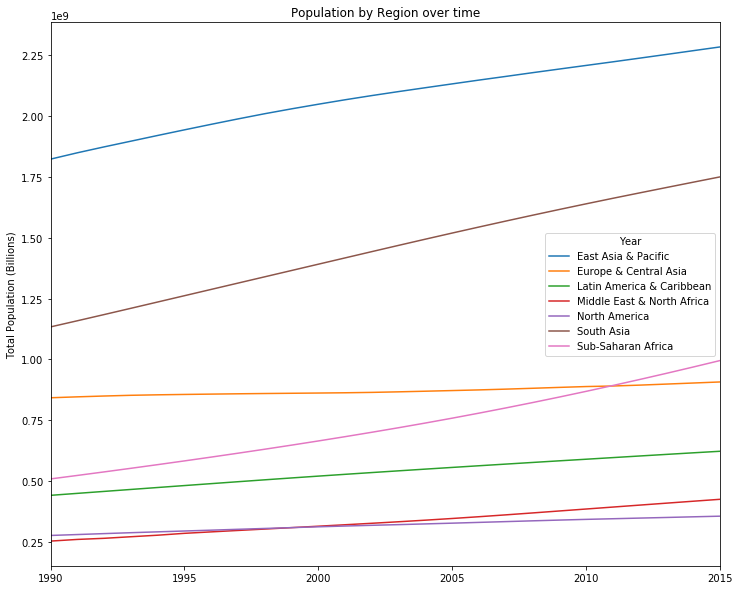

In [22]:
total_population_regions_df_1990_2015.plot(title='Population by Region over time', figsize=(12,10))
plt.ylabel('Total Population (Billions)')

## 2.2 Population Growth rate by region

Text(0, 0.5, 'Population Growth Rate (Percentage)')

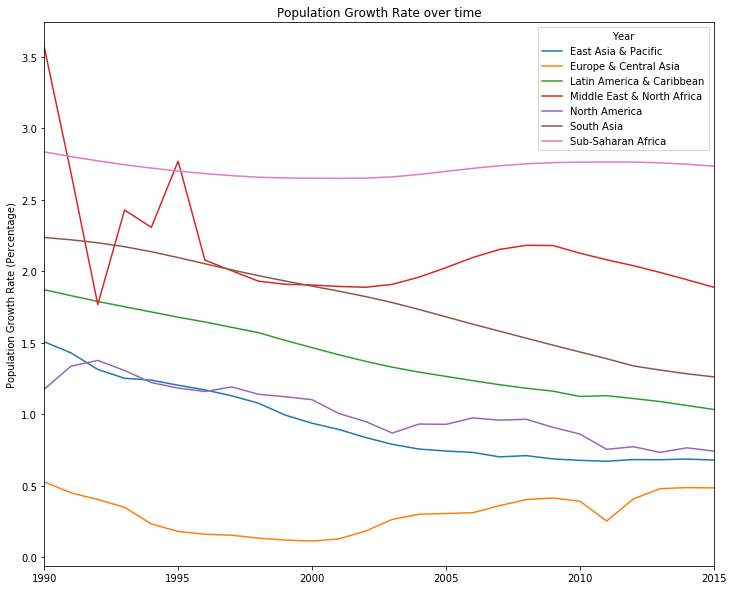

In [23]:
population_growth_rates_regions_df_1990_2015.plot(title='Population Growth Rate over time', figsize=(12,10))
plt.ylabel('Population Growth Rate (Percentage)')

## 2.3 Plotting Share of Deaths to Unsafe Water by Region

Text(0, 0.5, 'Percentage of Deaths by Unsafe Water')

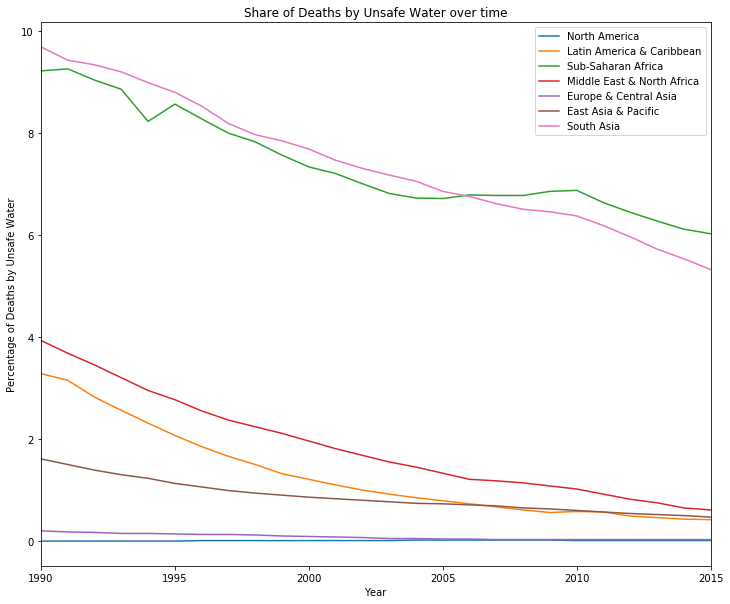

In [24]:
unsafe_water_regions_1990_2015.plot(title='Share of Deaths by Unsafe Water over time', figsize=(12,10))
plt.ylabel('Percentage of Deaths by Unsafe Water')

## 2.4 Plotting Share of Population with Access to Improved Drinking Water

Text(0, 0.5, 'Percentage of Population with Access to Improved Drinking Water')

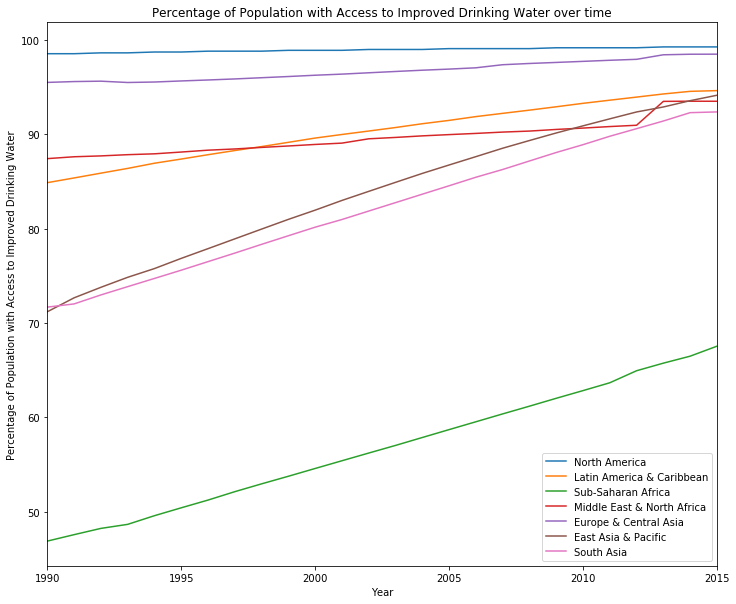

In [25]:
improved_water_regions_1990_2015.plot(title='Percentage of Population with Access to Improved Drinking Water over time', figsize=(12,10))
plt.ylabel('Percentage of Population with Access to Improved Drinking Water')

## 3. Exploratory Data Analysis

Sub-Saharan Africa will be the focus of this analysis because it has the highest population growth, the highest share deaths due to unsafe water, and the lowest access to improved drinking water.

In [26]:
# Lets start by creating a Sub-Saharan Africa data frame
data_africa = {'Improved Drinking Water':sub_suharan_improved_water, 'Deaths by Unsafe Water':unsafe_water_regions_1990_2015['Sub-Saharan Africa'].values, 'Population Growth Rate':population_growth_rates_regions_df_1990_2015['Sub-Saharan Africa'].values , 'Total Population':total_population_regions_df_1990_2015['Sub-Saharan Africa'].values}
sub_saharan_africa = pd.DataFrame(data_africa)
sub_saharan_africa.head()

,Improved Drinking Water,Deaths by Unsafe Water,Population Growth Rate,Total Population
0,46.892503,9.21,2.834931,509451851.0
1,47.574676,9.25,2.802043,523726913.0
2,48.238131,9.03,2.772352,538246469.0
3,48.666323,8.85,2.744819,553020362.0
4,49.584787,8.22,2.721716,568072008.0


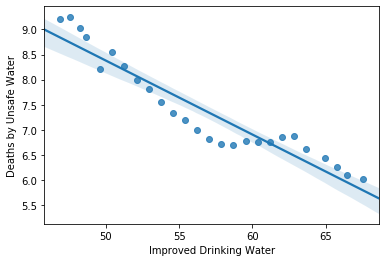

In [27]:
sns.regplot(x='Improved Drinking Water', y='Deaths by Unsafe Water', data=sub_saharan_africa)

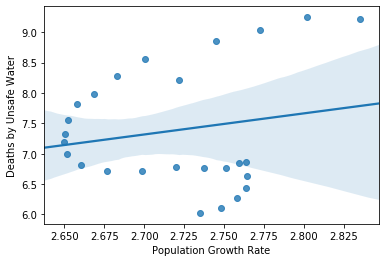

In [28]:
sns.regplot(x='Population Growth Rate', y='Deaths by Unsafe Water', data=sub_saharan_africa)

We can use the Pandas method corr()  to find the feature that is most correlated with 'Deaths by Unsafe Water'.

In [29]:
sub_saharan_africa[['Improved Drinking Water','Deaths by Unsafe Water','Total Population','Population Growth Rate']].corr()

,Improved Drinking Water,Deaths by Unsafe Water,Total Population,Population Growth Rate
Improved Drinking Water,1.000000,-0.946741,0.997519,0.091015
Deaths by Unsafe Water,-0.946741,1.000000,-0.926161,0.182624
Total Population,0.997519,-0.926161,1.000000,0.139385
Population Growth Rate,0.091015,0.182624,0.139385,1.000000


<h3>Residual Plot</h3>

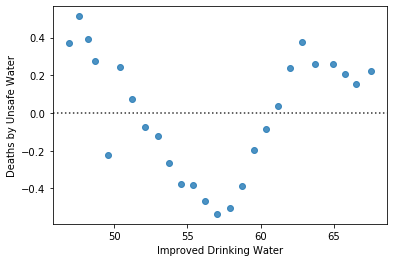

In [30]:
sns.residplot(sub_saharan_africa['Improved Drinking Water'], sub_saharan_africa['Deaths by Unsafe Water'])

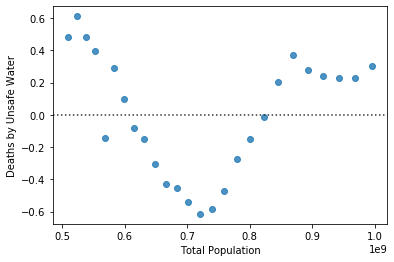

In [31]:
sns.residplot(sub_saharan_africa['Total Population'], sub_saharan_africa['Deaths by Unsafe Water'])

Because the residual is not random, this suggests that a linear model will not be the best model. This looks like a second order polynomial.

<a href="#item4"></a>
## 4. Model Development

<h3>4.1 Linear Regression Model</h3>

We can Fit a linear regression model using the  longitude feature 'Improved Drinking Water' and calculate the R^2.

In [32]:
X = sub_saharan_africa[['Improved Drinking Water']]
Y = sub_saharan_africa['Deaths by Unsafe Water']
lm = LinearRegression()
lm
lm.fit(X,Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.8963175744135764


In [33]:
# coeffs and intercept
print(lm.coef_, lm.intercept_)

[-0.14710209] 15.735022972423712


We can fit a linear regression model to predict the 'Deaths by Unsafe Water' using the feature 'Improved Drinking Water' then calculate the R^2.

In [34]:
a = sub_saharan_africa[['Improved Drinking Water']]
b = sub_saharan_africa['Deaths by Unsafe Water']
lm.fit(a,b)
yhat=lm.predict(a)
lm.score(a,b)

# we compare the predicted results with the actual results
mse = mean_squared_error(sub_saharan_africa['Deaths by Unsafe Water'], yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.09726613990741145


<h3>4.2 Multi-linear Regression Model</h3>

We can fit a linear regression model to predict the 'Deaths by Unsafe Water' using the list of all features.

In [35]:
features = ['Improved Drinking Water', 'Population Growth Rate', 'Total Population']
z=sub_saharan_africa[features]
b = sub_saharan_africa['Deaths by Unsafe Water']
lm.fit(z,b)
yhat_1=lm.predict(z)

# Find the R^2
print('The R-square is: ', lm.score(z,b))

The R-square is:  0.979113804145194


In [36]:
# coeffs and intercept
print(lm.coef_, lm.intercept_)

[-4.54196141e-01  3.32018197e+00  1.31460109e-08] 14.590036867162137


Result of Multi-regression model: 'Deaths by Unsafe Water' = 14.59 + (-0.45)*'Improved Drinking Water' + (3.32)*'Population Growth Rate' + (1.31)*'Total Population'

In [37]:
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(b, yhat_1))

The mean square error of price and predicted value using multifit is:  0.019593674016179365


Model Evaluation using Visualization

Text(0, 0.5, 'Proportion of Deaths by Unsafe Water')

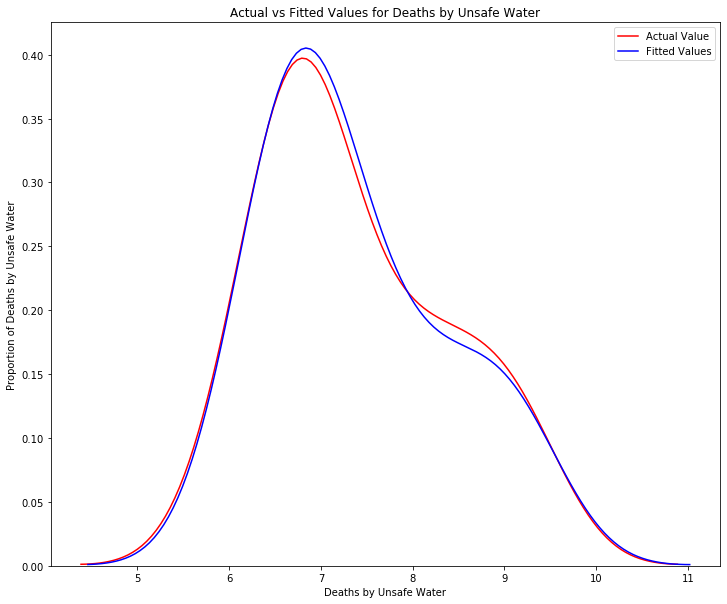

In [38]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(sub_saharan_africa['Deaths by Unsafe Water'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat_1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Deaths by Unsafe Water')
plt.xlabel('Deaths by Unsafe Water')
plt.ylabel('Proportion of Deaths by Unsafe Water')

<h3>4.3 Polynomial Regression Model</h3>

<p>We will use the following function to plot the data:</p>

In [39]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(45, 70, 100)
    y_new = model(x_new)
    
    plt.figure(figsize=(12, 10))

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Deaths by Unsafe Water')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Deaths by Unsafe Water')

    plt.show()
    plt.close()

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [40]:
# Here we use a polynomial of the 2nd order (cubic) 
x = sub_saharan_africa['Improved Drinking Water']
y = sub_saharan_africa['Deaths by Unsafe Water']
f = np.polyfit(x, y, 5)
p = np.poly1d(f)
print(p)

           5             4           3         2
1.877e-06 x - 0.0006509 x + 0.08677 x - 5.606 x + 176.3 x - 2158


In [41]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.9831753767319115


In [42]:
print('The mean square error of price and predicted value using polyfit is: ', mean_squared_error(y, p(x)))

The mean square error of price and predicted value using polyfit is:  0.015783447883550218


<h3>Polynomial Fit PLot</h3>

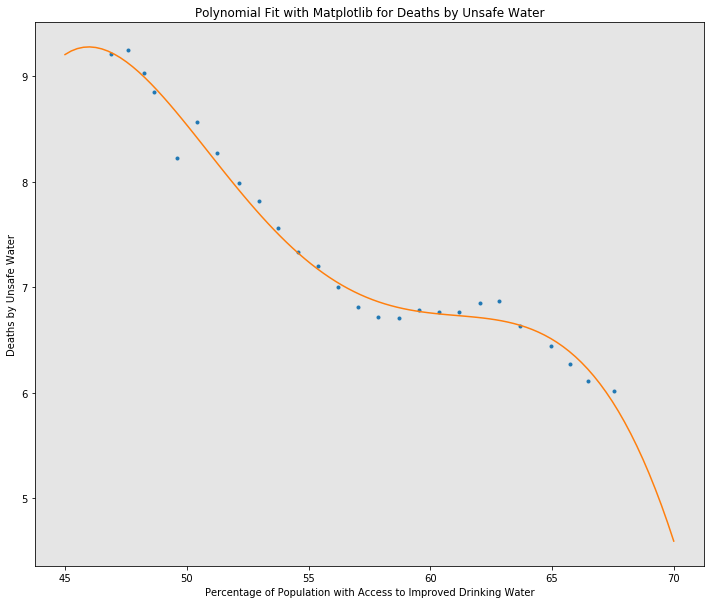

In [43]:
PlotPolly(p, x, y, 'Percentage of Population with Access to Improved Drinking Water')

<h3>4.4 Non-Linear Regression</h3>

In [44]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [45]:
x_data = sub_saharan_africa['Improved Drinking Water']
y_data = sub_saharan_africa['Deaths by Unsafe Water']

In [46]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [47]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = -6.049261, beta_2 = 1.079241


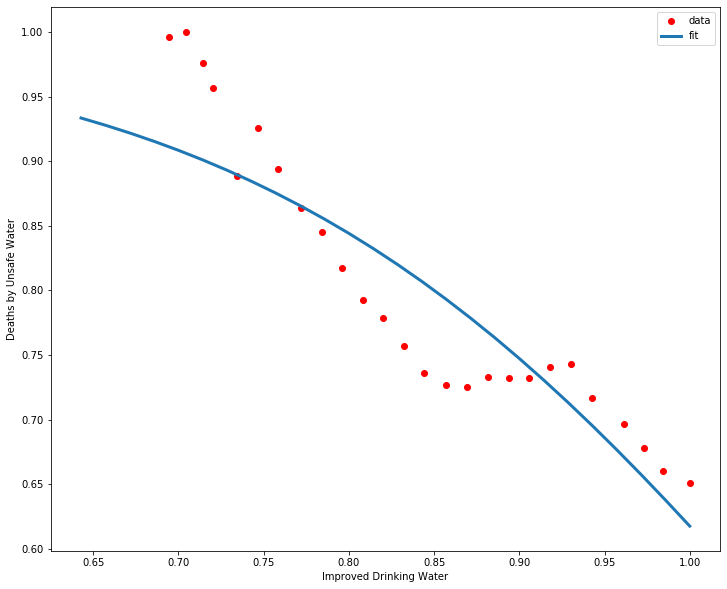

In [48]:
x = np.linspace(45, 70, 26)
x = x/max(x)
plt.figure(figsize=(12,10))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Deaths by Unsafe Water')
plt.xlabel('Improved Drinking Water')
plt.show()

In [49]:
# split data into train/test
msk = np.random.rand(len(sub_saharan_africa)) > 0.2
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.00
R2-score: -0.36


<h3>4.5 Measures for In-Sample Evaluation</h3>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>


<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

<p>The R-square is:  0.8963175744135764</p>
<p>The mean square error of price and predicted value is:  0.09726613990741145</p>

<h3>Model 2: Multiple Linear Regression</h3>

<p>The R-square is:  0.979113804145194</p>
<p>The mean square error of price and predicted value using multifit is:  0.019593674016179393</p>

<h3>Model 3: Polynomial Fit</h3>

<p>The R-square value is:  0.9831753767319534</p>
<p>The mean square error of price and predicted value using polyfit is:  0.015783447883510847</p>

<h3>Model 4: Non-Linear Regression</h3>

<p>The R-square value is:  0.79</p>
<p>The mean square error of price and predicted value using polyfit is:  0.0</p>

## 5. Model Training

<h3>5.1 Training and Testing</h3>

In [50]:
features = ['Improved Drinking Water', 'Population Growth Rate', 'Total Population']   
x_independent = sub_saharan_africa[features]
y_dependent = sub_saharan_africa['Deaths by Unsafe Water']

x_train, x_test, y_train, y_test = train_test_split(x_independent, y_dependent, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4
number of training samples: 22


<h3>5.2 Ridge Regression</h3>

In [51]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.38805e-19): result may not be accurate.
  overwrite_a=True).T


0.9739340549785299

In [52]:
pr=PolynomialFeatures(degree=1)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
lm.fit(x_train_pr,y_train)
lm.fit(x_test_pr,y_test)

RidgeModel=Ridge(alpha=0.01)
RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.99912e-20): result may not be accurate.
  overwrite_a=True).T


0.9861308024986779

<h3>5.3 Polynomial Evaluation</h3>

In [53]:
test_x_poly = pr.fit_transform(x_test)
y_test_ = lm.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test_ , y_test) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00
